In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import pytesseract
TESSERACT_LINK = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = TESSERACT_LINK

In [3]:
link_mucluc = r"D:\Product\text_summarizer\datasets\data_image\bup_sen_xanh\image\Bup-Sen-xanh_page_1.png"
# Load ảnh
image_1 = cv2.imread(link_mucluc)
image_2 = cv2.imread(link_mucluc)
print(image_1.shape)
print(image_2.shape)

(2200, 1700, 3)
(2200, 1700, 3)


In [4]:
# Chuyển ảnh sang ảnh grayscale
gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)

# Sử dụng MSER để phát hiện vùng chữ
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(gray)

# Lọc các vùng quá nhỏ
hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
hulls = [h for h in hulls if cv2.contourArea(h) > 100]

# Sắp xếp các vùng theo thứ tự từ trên xuống dưới
hulls.sort(key=lambda x: cv2.boundingRect(x)[1])

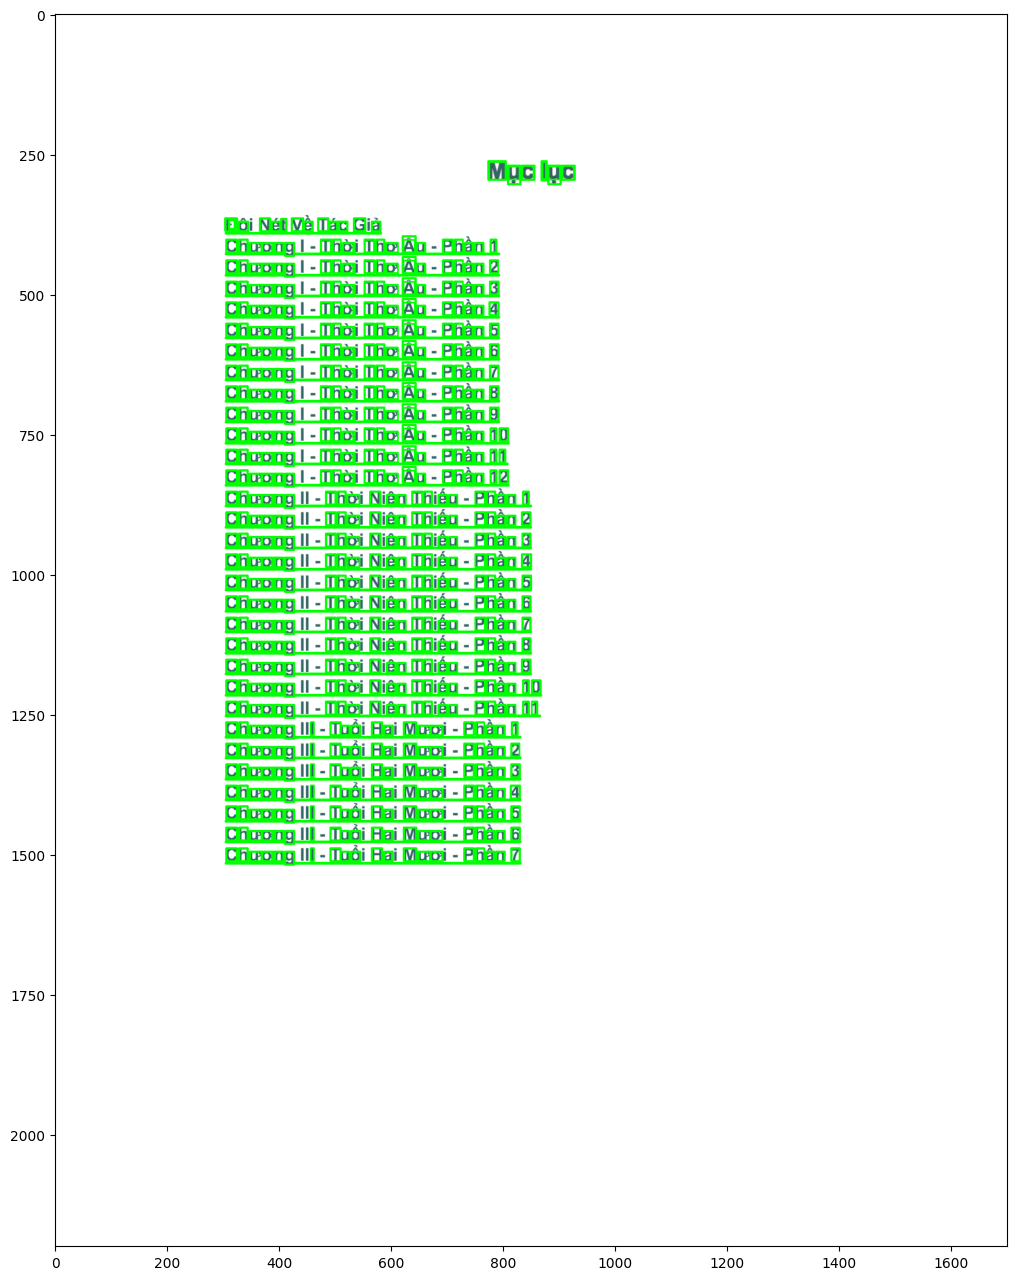

In [5]:
image_copy = image_1.copy()
# Vẽ hình chữ nhật quanh các vùng chữ
for hull in hulls:
    x, y, w, h = cv2.boundingRect(hull)
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Lưu ảnh có vùng chữ được vẽ
# cv2.imwrite(r'D:\Product\text_summarizer\datasets\data_test\output.jpg', image_1)
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_copy)

In [6]:
# Chia ảnh thành các dòng chữ
lines = []
line = []
for hull in hulls:
    x, y, w, h = cv2.boundingRect(hull)
    if line and y - line[-1][1] > h * 1.2:  # Nếu khoảng cách lớn hơn 1.2 lần chiều cao
        lines.append(line)
        line = []
    line.append((x, y, x + w, y + h))
if line:
    lines.append(line)

In [7]:
# Tính toán khoảng cách trung bình giữa các dòng chữ
avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)

# Tính toán padding
line_margin = int(avg_line_spacing / 8)
print("margin = ", line_margin)
# Lấy kích thước ảnh
height, width = image_1.shape[:2]
print("height, width = ", height, width)


margin =  -4
height, width =  2200 1700


In [8]:
lines_rects = []
for line in lines:
    # Tính toán margin trái phải
    # left_margin = min(rect[0] for rect in line)
    # right_margin = width - max(rect[2] for rect in line)
    # horizontal_margin = int(min(left_margin, right_margin) / 2)

    # x_min = min(rect[0] for rect in line) - horizontal_margin
    x_min = min(rect[0] for rect in line) + line_margin
    y_min = min(rect[1] for rect in line) + line_margin
    # x_max = max(rect[2] for rect in line) + horizontal_margin
    x_max = max(rect[2] for rect in line) - line_margin
    y_max = max(rect[3] for rect in line) - line_margin
    lines_rects.append((x_min, y_min, x_max, y_max))
    # Vẽ hình chữ nhật lớn xung quanh tất cả các hình chữ nhật con
    cv2.rectangle(image_2, (x_min, y_min), (x_max, y_max), (0, 255, 0), 1)

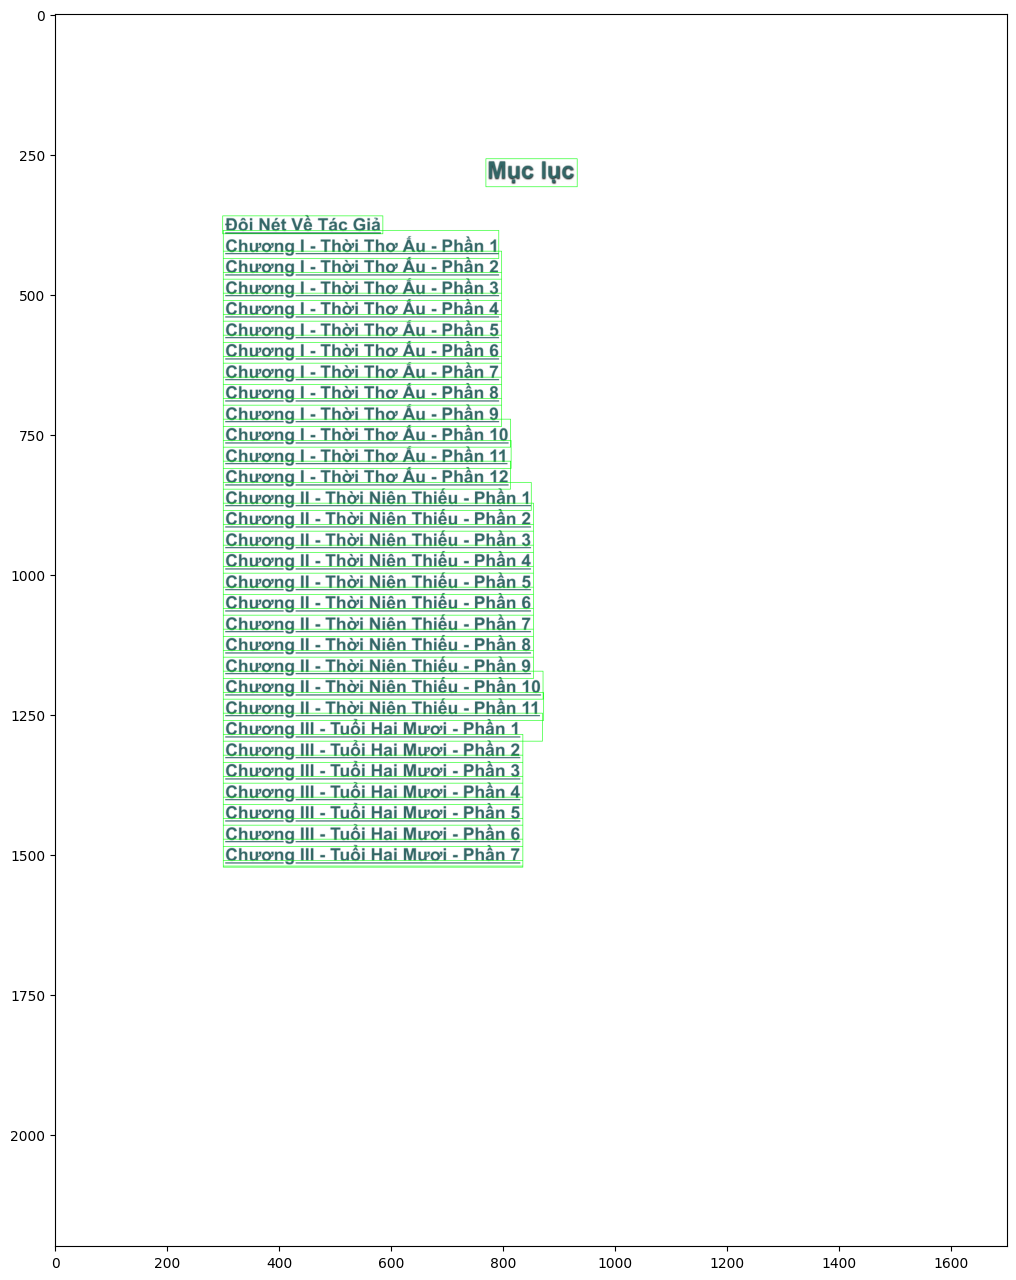

In [9]:

# Lưu ảnh có vùng chữ được vẽ

cv2.imwrite(r"D:\Product\text_summarizer\datasets\data_test\output2.jpg", image_2)

plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_2)

In [10]:
# Đảm bảo rằng thư mục lưu trữ ảnh đã được tạo
import os

output_dir = 'output_images/bup_sen_xanh'
os.makedirs(output_dir, exist_ok=True)

In [11]:
def crop_box(image, box_coordinates):
    """
    Cắt ảnh theo tọa độ hình chữ nhật đã cho.

    Args:
        image (numpy.ndarray): Ảnh nguồn.
        box_coordinates (tuple): Tọa độ hình chữ nhật (x_min, y_min, x_max, y_max).

    Returns:
        numpy.ndarray: Ảnh đã được cắt theo tọa độ hình chữ nhật.
    """
    x_min, y_min, x_max, y_max = box_coordinates
    return image[y_min:y_max, x_min:x_max]

In [12]:
print(lines)

[[(773, 262, 805, 296), (773, 262, 805, 296), (869, 262, 877, 296), (868, 262, 878, 297), (775, 263, 804, 295), (775, 263, 804, 295), (775, 263, 804, 295), (775, 263, 804, 295), (775, 263, 804, 295), (775, 263, 804, 295), (775, 263, 804, 295), (774, 263, 804, 295), (774, 263, 804, 295), (774, 263, 804, 295), (774, 263, 804, 295), (774, 263, 804, 295), (774, 263, 805, 296), (774, 263, 805, 296), (774, 263, 805, 296), (774, 263, 805, 296), (870, 263, 876, 295), (870, 263, 876, 295), (870, 263, 876, 295), (869, 263, 877, 295), (869, 263, 877, 295), (869, 263, 877, 295), (869, 263, 877, 296), (775, 264, 804, 295), (870, 264, 876, 294), (833, 270, 855, 296), (833, 270, 855, 296), (833, 270, 855, 296), (833, 270, 855, 296), (833, 270, 856, 296), (833, 270, 856, 296), (808, 270, 831, 304), (880, 270, 903, 304), (905, 270, 927, 296), (905, 270, 927, 296), (905, 270, 927, 296), (905, 270, 927, 296), (905, 270, 927, 296), (905, 270, 928, 296), (809, 271, 830, 295), (809, 271, 830, 303), (809, 27

In [13]:
# # Xử lý từng dòng chữ và lưu ảnh vào tệp tin
# for i, line in enumerate(lines):
#     # Cắt ảnh theo dòng chữ
#     roi = image_2[min(rect[1] for rect in line):max(rect[3] for rect in line),
#                 min(rect[0] for rect in line):max(rect[2] for rect in line)]
#     # Đặt tên cho tệp tin ảnh
#     filename = os.path.join(output_dir, f'line_{i}.jpg')
    
#     # Lưu ảnh vào tệp tin
#     cv2.imwrite(filename, roi)

In [14]:
# Xử lý từng dòng chữ và lưu ảnh vào tệp tin
for i, line in enumerate(lines_rects):
    roi = crop_box(image_1, line)
    
    # Đặt tên cho tệp tin ảnh
    filename = os.path.join(output_dir, f"line_{i}.jpg")

    # Lưu ảnh vào tệp tin
    cv2.imwrite(filename, roi)

In [15]:
def detect_text_area(image):
    if len(image.shape) == 3:
        # Nếu ảnh không phải là ảnh grayscale, chuyển đổi sang ảnh grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        # Nếu ảnh đã là ảnh grayscale, sử dụng ảnh đó trực tiếp
        gray = image.copy()
    # Sử dụng MSER để phát hiện vùng chữ
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(gray)

    # Lọc các vùng quá nhỏ
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
    hulls = [h for h in hulls if cv2.contourArea(h) > 100]
    # Sắp xếp các vùng theo thứ tự từ trên xuống dưới
    hulls.sort(key=lambda x: cv2.boundingRect(x)[1])

    return hulls

In [16]:
def detect_line_word(image):
    hulls = detect_text_area(image)
    # Chia ảnh thành các dòng chữ
    lines = []
    current_line = []
    for hull in hulls:
        x, y, w, h = cv2.boundingRect(hull)
        if (
            current_line and y - current_line[-1][1] > h * 1.2
        ):  # Khoảng cách lớn hơn 1.2 lần chiều cao
            lines.append(current_line)
            current_line = []
        current_line.append((x, y, x + w, y + h))
    if current_line:
        lines.append(current_line)

    # Tính toán khoảng cách trung bình giữa các dòng chữ
    avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)

    # Tính toán margin
    line_margin = int(avg_line_spacing / 8)
    # Lấy kích thước ảnh
    # height, width = image.shape[:2]

    # Tạo hình chữ nhật lớn nhất chứa các dòng chữ
    lines_rects = []
    for line in lines:
        # Tính toán margin trái phải
        # left_margin = min(rect[0] for rect in line)
        # right_margin = width - max(rect[2] for rect in line)
        # horizontal_margin = int(min(left_margin, right_margin) / 2)

        # x_min = min(rect[0] for rect in line) - horizontal_margin
        x_min = min(rect[0] for rect in line) + line_margin
        y_min = min(rect[1] for rect in line) + line_margin
        # x_max = max(rect[2] for rect in line) + horizontal_margin
        x_max = max(rect[2] for rect in line) - line_margin
        y_max = max(rect[3] for rect in line) - line_margin
        lines_rects.append((x_min, y_min, x_max, y_max))
    return lines_rects

In [17]:
def detect_line_word(image):
    if len(image.shape) == 3:
        # Nếu ảnh không phải là ảnh grayscale, chuyển đổi sang ảnh grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        # Nếu ảnh đã là ảnh grayscale, sử dụng ảnh đó trực tiếp
        gray = image.copy()
    # Sử dụng MSER để phát hiện vùng chữ
    mser = cv2.MSER_create()
    regions, _ = mser.detectRegions(gray)

    # Lọc các vùng quá nhỏ
    hulls = [cv2.convexHull(p.reshape(-1, 1, 2)) for p in regions]
    hulls = [h for h in hulls if cv2.contourArea(h) > 100]
    # Sắp xếp các vùng theo thứ tự từ trên xuống dưới
    hulls.sort(key=lambda x: cv2.boundingRect(x)[1])
    # Chia ảnh thành các dòng chữ
    lines = []
    current_line = []
    for hull in hulls:
        x, y, w, h = cv2.boundingRect(hull)
        if (
            current_line and y - current_line[-1][1] > h * 1.2
        ):  # Khoảng cách lớn hơn 1.2 lần chiều cao
            lines.append(current_line)
            current_line = []
        current_line.append((x, y, x + w, y + h))
    if current_line:
        lines.append(current_line)

    # Tính toán khoảng cách trung bình giữa các dòng chữ
    avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)

    # Tính toán margin
    line_margin = int(avg_line_spacing / 8)

    # Tạo hình chữ nhật lớn nhất chứa các dòng chữ
    lines_rects = []
    for line in lines:

        x_min = min(rect[0] for rect in line) + line_margin
        y_min = min(rect[1] for rect in line) + line_margin
        x_max = max(rect[2] for rect in line) - line_margin
        y_max = max(rect[3] for rect in line) - line_margin
        lines_rects.append((x_min, y_min, x_max, y_max))
    return lines_rects

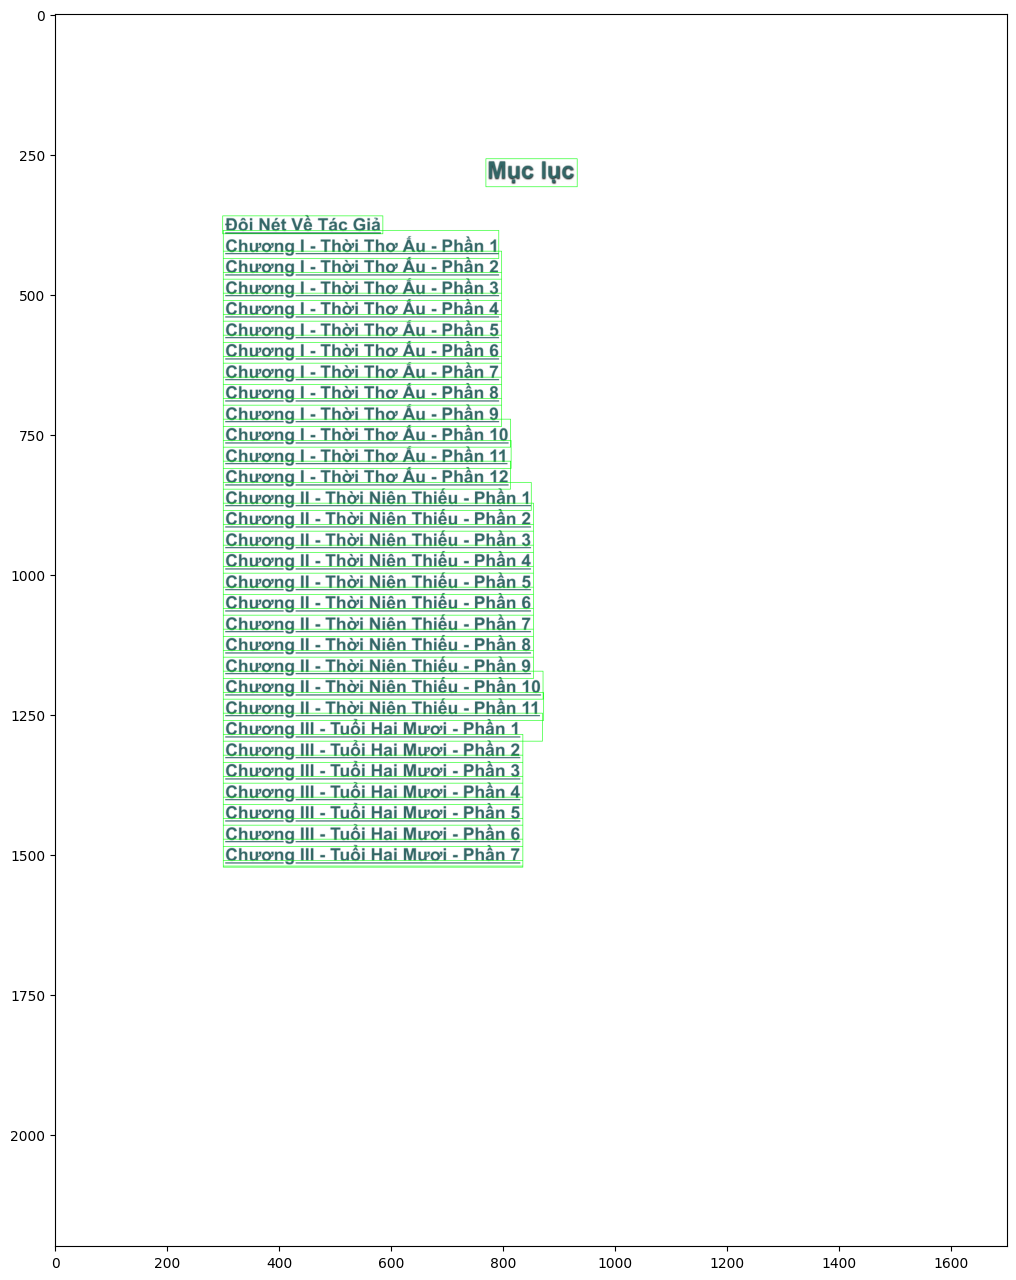

In [18]:
image_edit = cv2.imread(link_mucluc)

new_lines = detect_line_word(image_edit)

for line in new_lines:
    # Vẽ hình chữ nhật lớn xung quanh tất cả các hình chữ nhật con
    cv2.rectangle(image_edit, (line[0], line[1]), (line[2], line[3]), (0, 255, 0), 1)
    
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_edit)

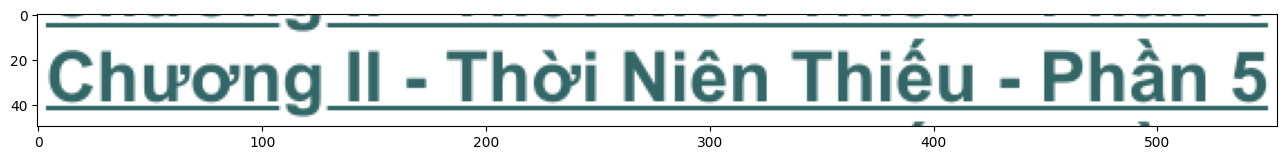

In [19]:
import random

image_crop = crop_box(image_1, new_lines[random.randint(1, 42)])
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_crop)

In [20]:
# def group_boxes(boxes, max_distance):
#     """
#     Nhóm các hộp ký tự gần nhau thành một nhóm.

#     Args:
#         boxes (list): Danh sách các hộp ký tự, mỗi hộp ký tự được biểu diễn bằng tọa độ (x, y, w, h).
#         max_distance (int): Khoảng cách tối đa để xem xét hai hộp ký tự là gần nhau.

#     Returns:
#         list: Danh sách các nhóm hộp ký tự, mỗi nhóm là một danh sách các hộp ký tự.
#     """
#     groups = []
#     boxes.sort(key=lambda box: box[0])  # Sắp xếp theo tọa độ x

#     current_group = [boxes[0]]

#     for box in boxes[1:]:
#         last_box = current_group[-1]
#         distance = box[0] - (last_box[0] + last_box[2])  # Khoảng cách giữa hai hộp ký tự

#         if distance <= max_distance:
#             current_group.append(box)
#         else:
#             groups.append(current_group)
#             current_group = [box]

#     if current_group:
#         groups.append(current_group)

#     # Tạo hình chữ nhật lớn nhất chứa các box gần nhau
#     lines_rects = []
#     line_margin = 10  # Khoảng cách giữa hình chữ nhật và các box
#     for line in groups:
#         x_min = min(rect[0] for rect in line) - line_margin
#         y_min = min(rect[1] for rect in line) - line_margin
#         x_max = max(rect[2] for rect in line) + line_margin
#         y_max = max(rect[3] for rect in line) + line_margin
#         lines_rects.append((x_min, y_min, x_max, y_max))

#     return lines_rects

In [21]:
from sklearn.cluster import DBSCAN

def group_boxes(boxes):
    groups = []
    boxes.sort(key=lambda box: box[0])
    # Convert the data to numpy array   
    data_np = np.array(boxes)
    # Define the DBSCAN parameters
    epsilon = 50  # Distance threshold
    min_samples = 2  # Minimum number of samples in a cluster
    # Create the DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    # Fit the model to the data
    dbscan.fit(data_np)

    # Get the labels assigned to each point
    labels = dbscan.labels_
    # Get the unique labels (clusters)
    unique_labels = np.unique(labels)
    # Print the clusters
    for label in unique_labels:
        if label == -1:
            print("Noise points:")
        else:
            print("Cluster", label, ":")
            cluster_points = data_np[labels == label]
            # print(cluster_points)
    return lines_rects


In [22]:
detect_words = detect_text_area(image_crop)
# print(detect_words)

In [23]:
import cv2

boxes = []
for word in detect_words:
    rect = cv2.boundingRect(word)
    x, y, w, h = rect
    box = (x, y, x + w, y + h)
    boxes.append(box)
boxes.sort(key=lambda box: box[0])
print(boxes)

[(4, 4, 108, 6), (4, 4, 109, 6), (4, 41, 108, 43), (4, 41, 109, 43), (5, 16, 25, 39), (5, 16, 25, 39), (5, 16, 25, 39), (5, 16, 25, 40), (5, 16, 25, 40), (5, 16, 25, 40), (5, 16, 25, 40), (5, 16, 25, 40), (6, 16, 25, 39), (6, 16, 25, 39), (6, 16, 25, 39), (6, 16, 25, 39), (6, 17, 24, 39), (6, 17, 24, 39), (6, 17, 24, 39), (6, 17, 24, 39), (6, 17, 24, 39), (6, 17, 24, 39), (6, 17, 25, 39), (28, 16, 44, 39), (28, 16, 44, 39), (29, 17, 43, 39), (29, 17, 43, 39), (29, 17, 43, 39), (29, 17, 43, 39), (29, 17, 43, 39), (29, 17, 44, 39), (47, 22, 91, 40), (47, 22, 91, 40), (48, 22, 69, 40), (48, 23, 68, 39), (48, 23, 68, 39), (48, 23, 68, 39), (48, 23, 68, 39), (48, 23, 69, 39), (48, 23, 69, 40), (69, 22, 91, 39), (69, 22, 91, 39), (69, 22, 91, 40), (69, 22, 91, 40), (69, 22, 91, 40), (70, 22, 90, 39), (70, 23, 87, 39), (70, 23, 88, 39), (70, 23, 90, 39), (70, 23, 90, 39), (70, 23, 90, 39), (70, 23, 90, 39), (70, 23, 90, 39), (92, 22, 108, 39), (92, 22, 108, 39), (92, 22, 108, 39), (93, 22, 10

In [24]:
avg_line_spacing = sum(line[0][1] - line[-1][3] for line in lines) / len(lines)
line_margin = int(avg_line_spacing / 8)
group_boxes(boxes)

Cluster 0 :
Cluster 1 :
Cluster 2 :
Cluster 3 :
Cluster 4 :
Cluster 5 :
Cluster 6 :
Cluster 7 :


[(769, 258, 932, 308),
 (299, 360, 585, 392),
 (300, 386, 792, 436),
 (300, 423, 797, 473),
 (300, 461, 797, 511),
 (300, 498, 797, 548),
 (300, 536, 797, 586),
 (300, 573, 797, 623),
 (300, 611, 797, 661),
 (300, 648, 797, 698),
 (300, 686, 797, 736),
 (300, 723, 813, 773),
 (300, 761, 814, 811),
 (300, 798, 813, 848),
 (300, 836, 850, 886),
 (300, 873, 854, 923),
 (300, 911, 854, 961),
 (300, 948, 854, 998),
 (300, 986, 854, 1036),
 (300, 1023, 854, 1073),
 (300, 1061, 854, 1111),
 (300, 1098, 854, 1148),
 (300, 1136, 854, 1186),
 (300, 1173, 871, 1223),
 (300, 1211, 872, 1261),
 (300, 1248, 870, 1298),
 (300, 1286, 835, 1336),
 (300, 1323, 835, 1373),
 (300, 1361, 835, 1411),
 (300, 1398, 835, 1448),
 (300, 1436, 835, 1486),
 (300, 1473, 835, 1523),
 (300, 1511, 835, 1521)]

In [25]:
# grouped_boxes = group_boxes([cv2.boundingRect(word) for word in detect_words], max_distance=20)

In [26]:
# grouped_boxes

In [27]:
# for box in grouped_boxes:
#     print(box)
#     x, y, w, h = box
#     cv2.rectangle(image_crop, (x, y), (x + w, y + h), (0, 0, 255), 2)
# plt.rcParams['figure.figsize'] = (16, 16)
# plt.imshow(image_crop)

True

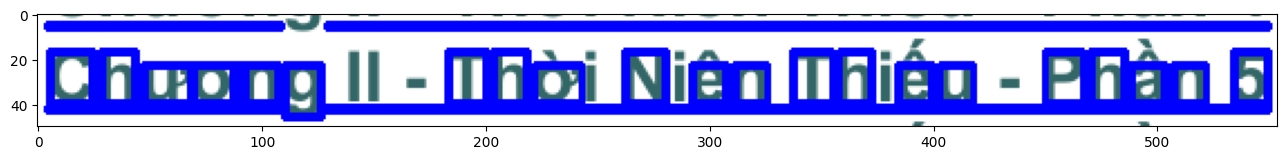

In [28]:
image_crop_cp = image_crop.copy()
for detect_word in detect_words:
    x, y, w, h = cv2.boundingRect(detect_word)
    cv2.rectangle(image_crop_cp, (x, y), (x + w, y + h), (0, 0, 255), 2)
plt.rcParams['figure.figsize'] = (16, 16)
plt.imshow(image_crop_cp)

cv2.imwrite("bup_sen_xanh_image_test.png", image_crop_cp)

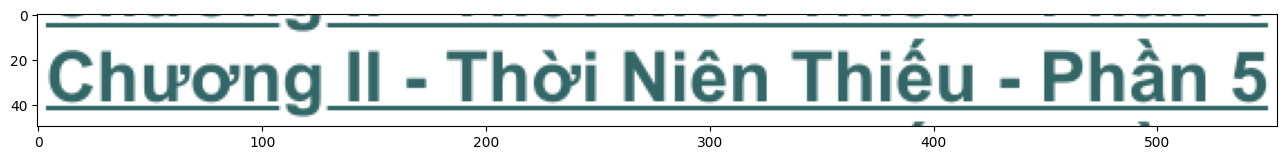

In [38]:
import cv2
import re

plt.imshow(image_crop)

In [39]:

text = pytesseract.image_to_string(gray, lang="vie")
text = " ".join(text.split()).strip()

print(text)

Chương lI - Thời Niên Thiếu - Phần 5


In [31]:
# #!pip install easyocr
# import easyocr
# reader = easyocr.Reader(["vi"])
# reader.readtext(image_crop)

In [32]:
import math

def rectangle_distance(rect1, rect2):
    # Tính toán tọa độ các đỉnh của hình hộp chữ nhật thứ nhất
    rect1_x_min, rect1_y_min, rect1_x_max, rect1_y_max = rect1
    rect1_points = [(rect1_x_min, rect1_y_min), (rect1_x_max, rect1_y_max)]

    # Tính toán tọa độ các đỉnh của hình hộp chữ nhật thứ hai
    rect2_x_min, rect2_y_min, rect2_x_max, rect2_y_max = rect2
    rect2_points = [(rect2_x_min, rect2_y_min), (rect2_x_max, rect2_y_max)]

    # Tìm khoảng cách giữa từng cặp đỉnh của hai hình hộp chữ nhật
    min_distance = float('inf')  # Khởi tạo khoảng cách nhỏ nhất là vô cùng lớn
    for point1 in rect1_points:
        for point2 in rect2_points:
            distance = math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2)
            if distance < min_distance:
                min_distance = distance

    return min_distance

# Tọa độ của các đỉnh của hai hình hộp chữ nhật
rect1 = (55, 16, 68, 33)
rect2 = (104, 15, 121, 33)

# Tính khoảng cách giữa hai hình hộp chữ nhật
distance = rectangle_distance(rect1, rect2)
print("Khoảng cách giữa hai hình hộp chữ nhật là:", distance)


Khoảng cách giữa hai hình hộp chữ nhật là: 40.24922359499622
